[*********************100%***********************]  5 of 5 completed
AAPL 0.17693080932978564
JD 0.08899930819667222
IBM 0.642534778454992
KO 0.03839260932791006
CAT 0.053142494690640085


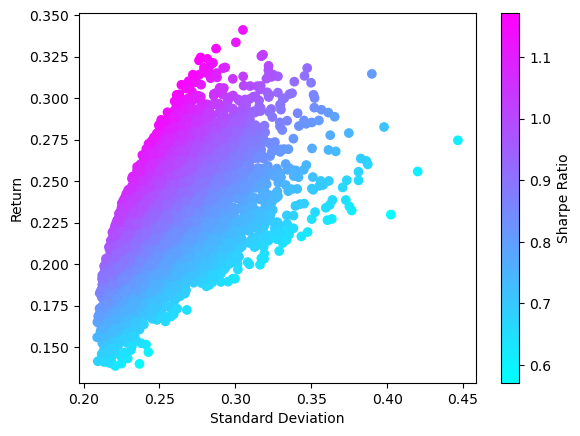

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

# Get stock data
tickers = ['AAPL', 'JD', 'IBM', 'KO', 'CAT']
start_date = '2019-01-01'
end_date = '2023-4-28'
stock_data = yf.download(tickers, start=start_date, end=end_date, group_by='ticker')

# Calculate daily returns
daily_returns = stock_data.xs('Adj Close', level = 1, axis = 1).pct_change()

# Calculate annual returns and covariances
annual_returns = daily_returns.mean() * 252
cov_matrix = daily_returns.cov() * 252

# Define objective function
def objective(weights, returns, cov_matrix):
    portfolio_return = np.dot(weights, returns)
    portfolio_variance = np.dot(weights.T, np.dot(cov_matrix, weights))
    portfolio_std_dev = np.sqrt(portfolio_variance)
    return portfolio_return, portfolio_std_dev

# Define function to simulate random portfolios
def simulate_random_portfolios(returns, cov_matrix, num_portfolios):
    num_assets = len(returns)
    all_weights = np.zeros((num_portfolios, num_assets))
    rets = np.zeros(num_portfolios)
    stds = np.zeros(num_portfolios)
    for i in range(num_portfolios):
        weights = np.random.random(num_assets)
        weights /= np.sum(weights)
        all_weights[i,:] = weights
        rets[i], stds[i] = objective(weights, returns, cov_matrix)
    return all_weights, rets, stds

# Perform Monte Carlo simulation
num_portfolios = 10000
all_weights, rets, stds = simulate_random_portfolios(annual_returns, cov_matrix, num_portfolios)

# Find portfolio with highest Sharpe ratio
sharpe_ratios = rets / stds
max_sharpe_ratio_index = np.argmax(sharpe_ratios)
optimal_weights = all_weights[max_sharpe_ratio_index,:]

# Print optimal portfolio
for i in range(len(tickers)):
    print(tickers[i], optimal_weights[i])

# Plot efficient frontier
plt.scatter(stds, rets, c=rets/stds, marker='o', cmap='cool')
plt.xlabel('Standard Deviation')
plt.ylabel('Return')
plt.colorbar(label='Sharpe Ratio')
plt.show()


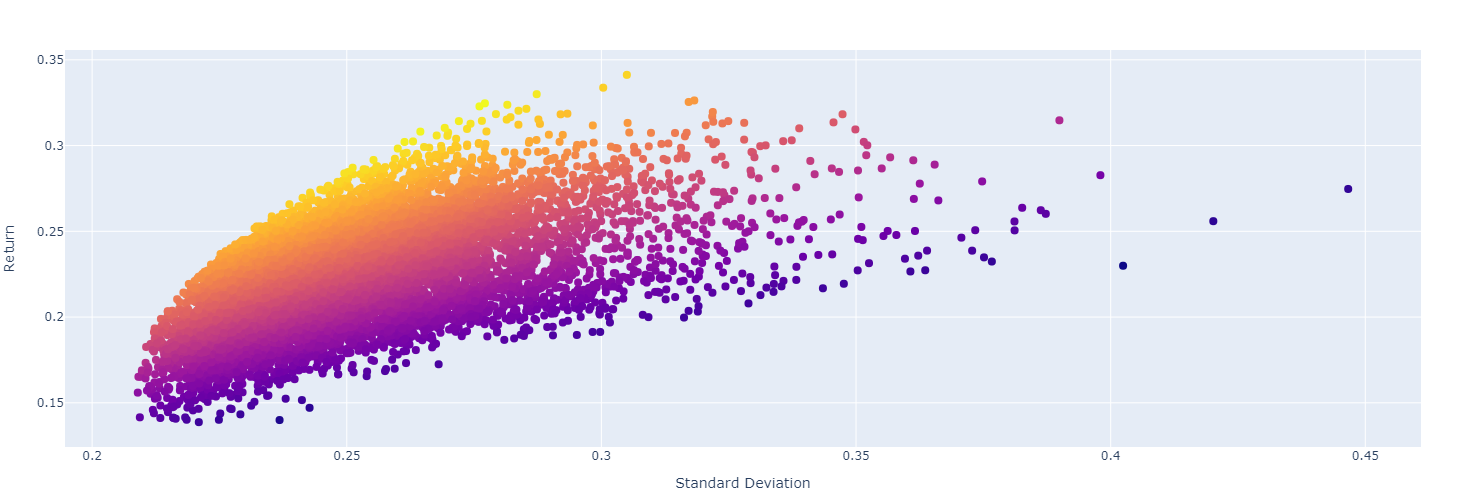

In [7]:
import plotly.graph_objects as go

fig = go.Figure(
    go.Scatter(
        x=stds,
        y=rets,
        mode='markers',
        marker=dict(
            size=8,
            color=rets/stds,
            
            symbol='circle'
        ),
        hovertemplate='Standard Deviation: %{x}<br>Return: %{y}<br>Sharpe Ratio: %{marker.color:.2f}<extra></extra>'
    )
).update_layout(
    xaxis_title='Standard Deviation',
    yaxis_title='Return',
    coloraxis=dict(
        colorbar=dict(
            title='Sharpe Ratio'
        )
    ),
    height=500,
    margin=dict(l=50, r=50, b=50, t=50),
)

fig.show()
